In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import random

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import collections

import math 

In [24]:
# Remove the outliers
def remove_outliers(file_path):
    # return the list of dataframes
    dataframe_lists = []
    # Creating the dataframe and selecting the required columns
    for i in range(64):
        df = pd.read_csv(file_path, usecols=[1,2,3,4], skiprows=i*72000, nrows = 72000, names=["lz","X","Y","Z"])
        df['radiusSquare'] = df['X']*df['X']+df['Y']*df['Y']+df['Z']*df['Z']
        df['radius'] = np.sqrt(df['radiusSquare']).round(1)
        df['freq'] = df.groupby(['lz','radius'])['radius'].transform('count')
        for j in range(64):
            maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
            while maxfreq>100:
                df.drop(df[(df['lz']==j) & (df['freq']==maxfreq)].index, inplace=True)
                maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
                df.drop(df[(df['lz']==j) & (df['radius']==0)].index, inplace=True)
        dataframe_lists.append(df.iloc[:,1:4])
    return dataframe_lists

In [25]:
# atm = remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_initial_dataset/Atm/in.csv")
# This the second data set that contains multiple objects
allData= remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/in.csv")


mX=np.array(allData[0]['X'])
mY=np.array(allData[0]['Y'])
mZ=np.array(allData[0]['Z'])

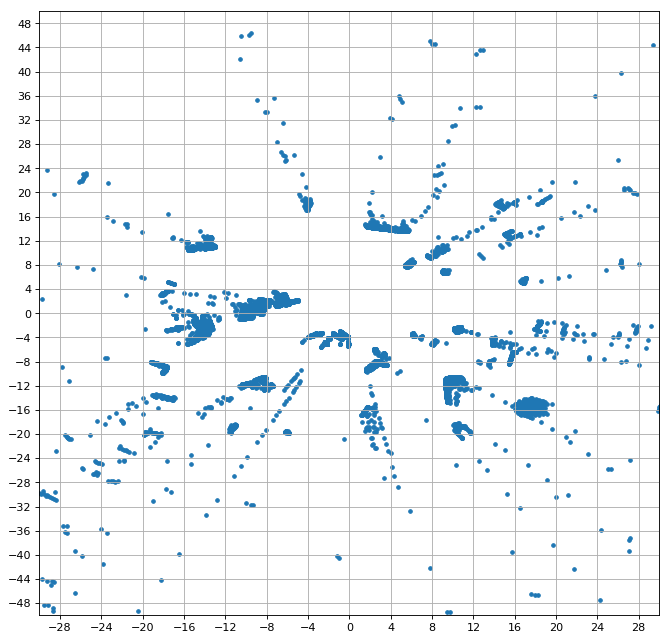

In [26]:
grid_size= 4
#fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
fig = plt.figure(figsize=(10, 10), dpi= 80)
ax = fig.gca()

ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))

plt.scatter(mZ, mX, s=10)
plt.xlim(-30, 30)
plt.ylim(-50, 50)
plt.grid()
plt.show()

In [27]:
def isInt(value):
    try:
        int(value)
        return True
    except:
        return False


numOfObjects = []

# Out put data.
# We need to get the number of objects. 
pathOutput="/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/out.csv"

with open(pathOutput) as fp:  
   line = fp.readline()
   cnt = 1
   while line:
    # print("Line {}: {}".format(cnt, line.strip()))
        lineArr=line.split(",")
        num = 0
        for index in range(1, len(lineArr)):
            if(isInt(lineArr[index])):
               num +=int(lineArr[index])
        numOfObjects.append(num)
        #print(line.split(",")[1])
        line = fp.readline()
        cnt += 1
        
        
        
print(max(numOfObjects))

aList=np.array(numOfObjects)
print(np.mean(aList))
print(np.median(aList))

50
29.186
29.0


In [9]:
# clustering with DBSCAN 
def doClusteringWithDBSCAN(data, eps=1, min_samples=15):
    
    clustering = DBSCAN(eps, min_samples).fit(data)

    labels = clustering.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    return n_clusters_, labels, n_noise_

1371


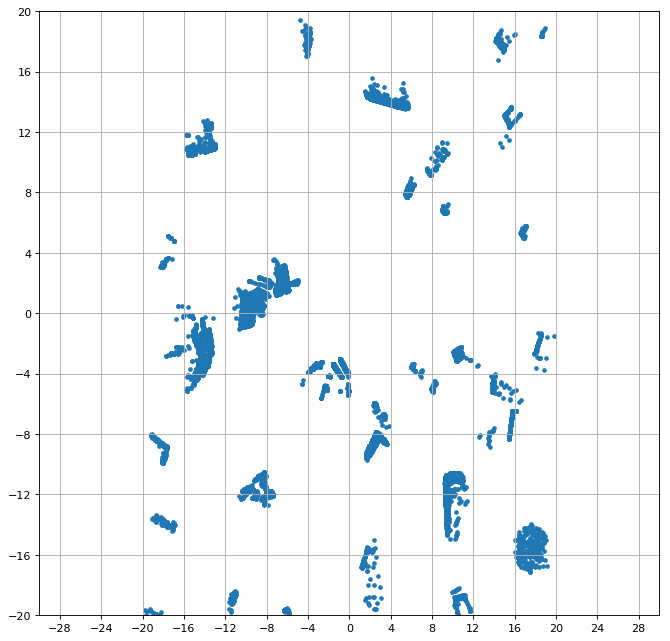

In [10]:
mX=np.array(allData[0]['X'])
mY=np.array(allData[0]['Y'])
mZ=np.array(allData[0]['Z'])

data =  np.array(list(zip(mX, mY, mZ)))


n_clusters_, labels, n_noise_ = doClusteringWithDBSCAN(data)

print(n_noise_)

# data1 = removeNoisewithDBSCAN(data)



# n_clusters_, labels, n_noise_ = doClusteringWithDBSCAN(data1)
# print(n_noise_)

# print(n_noise_)
# print("mX size", mX.size)
# print("labels size", labels.size)

condition = (labels!=-1)


mX2 = np.extract(condition, mX)
mY2 = np.extract(condition, mY)
mZ2 = np.extract(condition, mZ)
# print(mX2.size)


grid_size= 4
#fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
fig = plt.figure(figsize=(10, 10), dpi= 80)
ax = fig.gca()

ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))

plt.scatter(mZ2, mX2, s=10)
plt.xlim(-30, 30)
plt.ylim(-20, 20)
plt.grid()
plt.show()

In [21]:
# run a test. 
sum = 0 
for i in range(64):
    
    
    
    # data1 =  np.array(list(zip(np.array(allData[i]['Z']), np.array(allData[i]['X']), np.array(allData[i]['Y']))))
    data1 =  np.array(list(zip(np.array(allData[i]['Z']), np.array(allData[i]['X']), np.array(allData[i]['Y']))))
    # data1 =  np.array(list(zip(np.array(allData[i]['X']), np.array(allData[i]['Z']))))
    
    numberOfClusters, labels, n_noise_= doClusteringWithDBSCAN(data1, eps=1, min_samples=15)
    print(i, " Number Of Clusters: ", numberOfClusters, ", Difference is: ", numOfObjects[i] - numberOfClusters)
    sum = sum + ((numOfObjects[i] - numberOfClusters)**2)

print("Sum of the Squares", sum) 





0  Number Of Clusters:  34 , Difference is:  -1
1  Number Of Clusters:  27 , Difference is:  -2
2  Number Of Clusters:  28 , Difference is:  -3
3  Number Of Clusters:  18 , Difference is:  -1
4  Number Of Clusters:  20 , Difference is:  -4
5  Number Of Clusters:  35 , Difference is:  -1
6  Number Of Clusters:  33 , Difference is:  2
7  Number Of Clusters:  24 , Difference is:  -4
8  Number Of Clusters:  17 , Difference is:  0
9  Number Of Clusters:  35 , Difference is:  -3
10  Number Of Clusters:  43 , Difference is:  -4
11  Number Of Clusters:  45 , Difference is:  2
12  Number Of Clusters:  41 , Difference is:  -1
13  Number Of Clusters:  12 , Difference is:  0
14  Number Of Clusters:  19 , Difference is:  0
15  Number Of Clusters:  30 , Difference is:  -4
16  Number Of Clusters:  15 , Difference is:  1
17  Number Of Clusters:  33 , Difference is:  -3
18  Number Of Clusters:  29 , Difference is:  -1
19  Number Of Clusters:  44 , Difference is:  1
20  Number Of Clusters:  23 , Differe